In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.normal(0, 1, 20)

In [14]:
coeff_linear = np.polyfit(x, y, 1)
poly_linear = np.poly1d(coeff_linear)

In [15]:
projections = [(xi, poly_linear(xi)) for xi in x]

In [16]:
midpoints = [((xi + proj[0]) / 2, (yi + proj[1]) / 2) for (xi, yi), proj in zip(zip(x, y), projections)]

In [17]:
coeff_avg = np.polyfit([mp[0] for mp in midpoints], [mp[1] for mp in midpoints], 1)
poly_avg = np.poly1d(coeff_avg)

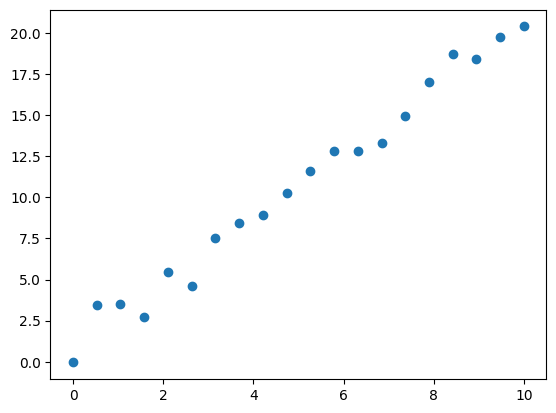

In [18]:
plt.scatter(x, y)

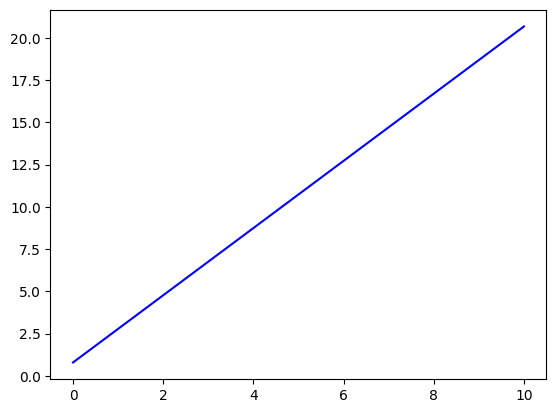

In [19]:
plt.plot(x, poly_linear(x), label='Linear Regression', color='blue')

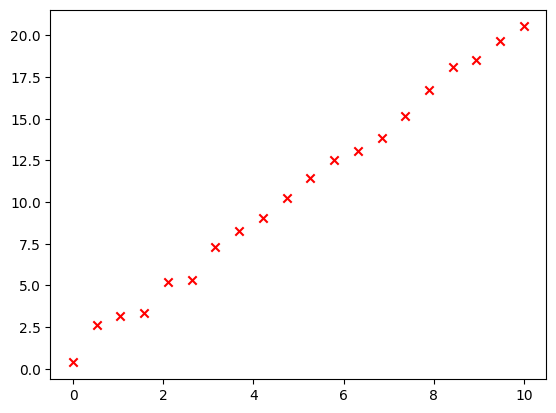

In [20]:
plt.scatter([mp[0] for mp in midpoints], [mp[1] for mp in midpoints], color='red', marker='x', label='Midpoints')


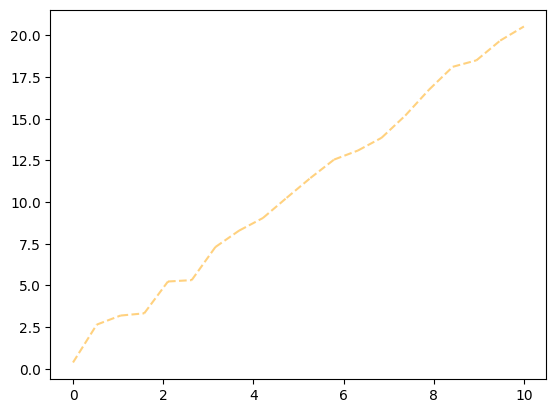

In [27]:
coefficients_overfit = []
for i in range(len(midpoints)-1):
    x_subset = [midpoints[i][0], midpoints[i+1][0]]
    y_subset = [midpoints[i][1], midpoints[i+1][1]]
    coefficients_overfit.append(np.polyfit(x_subset, y_subset, 1))
    plt.plot(x_subset, np.poly1d(coefficients_overfit[i])(x_subset), color='orange', linestyle='--', alpha=0.5)

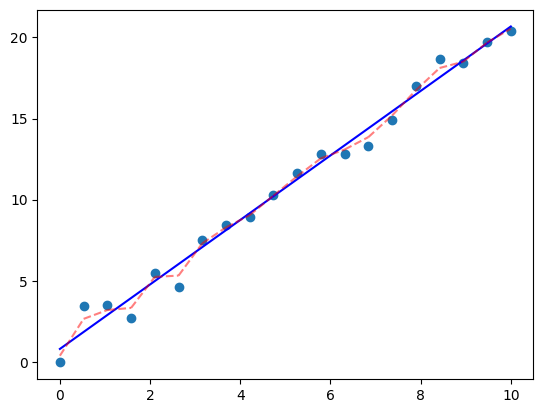

In [35]:
plt.scatter(x, y)
plt.plot(x, poly_linear(x), label='Linear Regression', color='blue')
coefficients_overfit = []
for i in range(len(midpoints)-1):
    x_subset = [midpoints[i][0], midpoints[i+1][0]]
    y_subset = [midpoints[i][1], midpoints[i+1][1]]
    coefficients_overfit.append(np.polyfit(x_subset, y_subset, 1))
    plt.plot(x_subset, np.poly1d(coefficients_overfit[i])(x_subset), color='red', linestyle='--', alpha=0.5)

plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model_linear = LinearRegression()
model_linear.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

In [42]:
y_pred_linear = model_linear.predict(x_test.reshape(-1, 1))

In [43]:
y_pred_overfit = np.array([np.poly1d(coefficients_overfit[i])(x_test) for i in range(len(midpoints)-1)]).mean(axis=0)

In [44]:
accuracy_linear = r2_score(y_test, y_pred_linear)
accuracy_overfit = r2_score(y_test, y_pred_overfit)

In [45]:
print("Accuracy (Linear Regression):", accuracy_linear)
print("Accuracy (Overfitted Midpoint Lines):", accuracy_overfit)

Accuracy (Linear Regression): 0.9851618756649172
Accuracy (Overfitted Midpoint Lines): 0.9870860328323606


In [46]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [48]:
import xgboost as xgb

In [49]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [50]:
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}

In [51]:
num_rounds = 100
model_xgb = xgb.train(params, dtrain, num_rounds)

In [52]:
y_pred_xgb = model_xgb.predict(dtest)
accuracy_xgb = r2_score(y_test, y_pred_xgb)
print("Accuracy (XGBoost):", accuracy_xgb)

Accuracy (XGBoost): 0.9373159910995346


In [55]:
print("Accuracy (Overfitted Midpoint Lines):", accuracy_overfit)
print("Accuracy (Linear Regression):", accuracy_linear)
print("Accuracy (XGBoost):", accuracy_xgb)

Accuracy (Overfitted Midpoint Lines): 0.9870860328323606
Accuracy (Linear Regression): 0.9851618756649172
Accuracy (XGBoost): 0.9373159910995346


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [57]:
r2_linear = r2_score(y_test, y_pred_linear)
r2_overfit = r2_score(y_test, y_pred_overfit)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [58]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_overfit = mean_squared_error(y_test, y_pred_overfit)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

In [59]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_overfit = mean_absolute_error(y_test, y_pred_overfit)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

In [60]:
print("Linear Regression:")
print("R-squared:", r2_linear)
print("MSE:", mse_linear)
print("MAE:", mae_linear)
print()

Linear Regression:
R-squared: 0.9851618756649172
MSE: 0.9767216762984698
MAE: 0.7803714332268572



In [61]:
print("Overfitted Midpoint Lines:")
print("R-squared:", r2_overfit)
print("MSE:", mse_overfit)
print("MAE:", mae_overfit)
print()

Overfitted Midpoint Lines:
R-squared: 0.9870860328323606
MSE: 0.8500637529918448
MAE: 0.7812783279059735



In [62]:
print("XGBoost:")
print("R-squared:", r2_xgb)
print("MSE:", mse_xgb)
print("MAE:", mae_xgb)

XGBoost:
R-squared: 0.9373159910995346
MSE: 4.126183934556517
MAE: 1.4553919613564257


# considering all the metrics, it seems that the Overfitted Midpoint Lines model performs slightly better than the Linear Regression model, while the XGBoost model performs the worst among the three models.